In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from syndic.prep.line_extractor import LineExtractor
from syndic.prep.bloc_extractor import BlocExtractor
from syndic.prep.data_extractor import DataExtractor
from syndic.prep.livre_journal import specs as lj_specs
from syndic.prep.page_area import PageArea

In [3]:
line_extractor = LineExtractor(lj_specs.path, lj_specs.get_line_specs())
pages_lines=line_extractor.compute()

In [4]:
bloc_interval_def = lj_specs.get_bloc_interval_def()
bloc_extractor = BlocExtractor(pages_lines, bloc_interval_def)

In [5]:
first_page_area = PageArea(pages_lines.doc[0], bloc_extractor.images[0])

# check limit pos
limit_pos = bloc_interval_def.get_limit_pos(first_page_area)
limit_area = first_page_area.get_area(limit_pos)

In [6]:
blocs = bloc_extractor.read_blocs()

In [7]:
len(blocs), len(blocs[0].images) # should be 4, 14

(4, 14)

In [8]:
# check bloc images
start_bloc_img = blocs[0].images[0].image
end_bloc_img = blocs[0].images[13].image

In [9]:
num_page = -1
page_area = PageArea(pages_lines.doc[num_page], bloc_extractor.images[num_page])

# check first bloc interval
page_lines = pages_lines.pages_lines[num_page]
bloc_interval_def.get_bloc_intervals(page_lines.lines, page_area)

[BlocInterval(start=None, end=BlocDelim(line=Line(row_num=16, content='162 pièces comptables 0,00', infos={'journal': 'Journal des opérations diverses 01/01/2022 au 31/12/2022'}), pos=[524.4600219726562, 143.70999145507812, 607.27001953125, 157.4499969482422]))]

In [10]:
# check last bloc images
last_start_bloc_img = blocs[-1].images[0].image
last_end_bloc_img = blocs[-1].images[-1].image

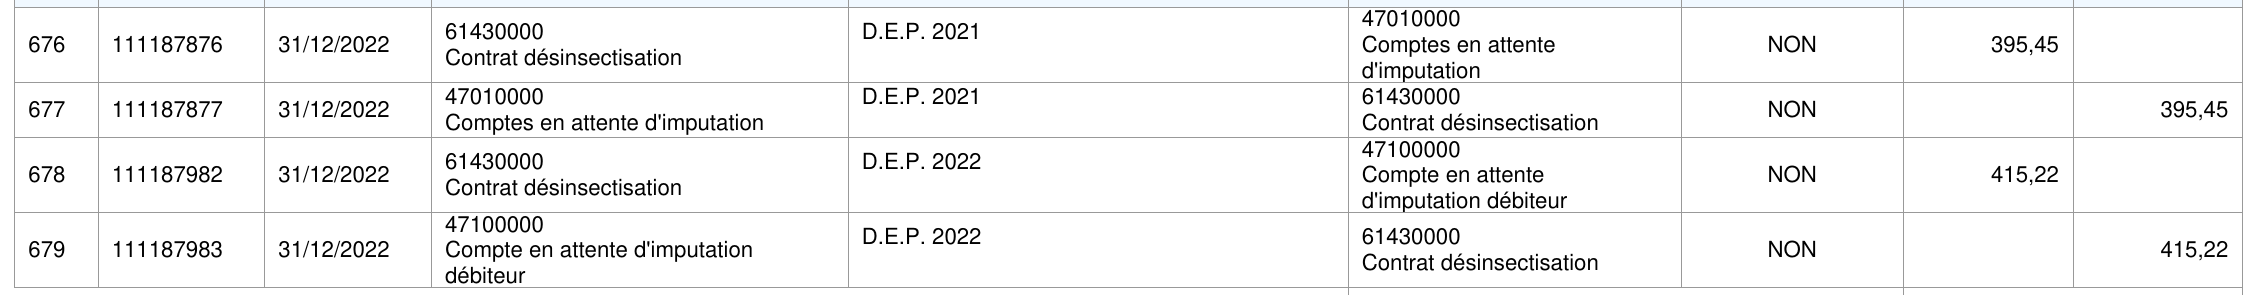

In [11]:
last_end_bloc_img # should have 4 entries 678-> 681

In [12]:
data_extractor = DataExtractor(bloc_extractor.path, lj_specs.get_data_specs())

In [13]:
datas = data_extractor.read_datas(blocs)

Got stderr: May 24, 2023 10:46:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:35 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:46:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:36 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:46:37 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:37 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:46:37 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:37 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:46:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:38 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:46:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:46:39 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 20

Got stderr: May 24, 2023 10:47:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:47:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:47:05 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:05 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:47:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:47:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 2023 10:47:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 24, 2023 10:47:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 24, 20

In [14]:
datas

nb  num_ecriture       date   
0      1      83944005 2022-01-04  \
1      2      83944006 2022-01-04   
2      3      84314530 2022-01-05   
3      4      84314531 2022-01-05   
4      5      84317455 2022-01-05   
..   ...           ...        ...   
674  675     100209743 2022-10-26   
675  676     111187876 2022-12-31   
676  677     111187877 2022-12-31   
677  678     111187982 2022-12-31   
678  679     111187983 2022-12-31   

                                                compte   
0                                   40100734\rSNMORENO  \
1                         51200002\rCIC GESTION SALOME   
2                          40101038\rPOLLANTRU PATRICK   
3                         51200002\rCIC GESTION SALOME   
4                            40101035\rCHERKI ET RIGOT   
..                                                 ...   
674                       51200002\rCIC GESTION SALOME   
675                 61430000\rContrat désinsectisation   
676          47010000\rComptes en attente d'imputation   
677                 61430000\rContrat désinsectisation   
678  47100000\rCompte en attente d'imputation\rdébi...   

                                     detail   
0    Rgl. VIRT / SNMORENO - 10/2021\r112649  \
1    Rgl. VIRT / SNMORENO - 10/2021\r112649   
2                  REGLT/VRMT DU 05.01.2022   
3                  REGLT/VRMT DU 05.01.2022   
4                  REGLT/VRMT DU 05/01/2022   
..                                      ...   
674          VIR ORANGE FAC 22F6-2K04-08/22   
675                             D.E.P. 2021   
676                             D.E.P. 2021   
677                             D.E.P. 2022   
678                             D.E.P. 2022   

                                          contrepartie  rapproche   debit   
0                         51200002\rCIC GESTION SALOME       True  481.21  \
1                                   40100734\rSNMORENO       True    <NA>   
2                         51200002\rCIC GESTION SALOME       True  1816.5   
3                          40101038\rPOLLANTRU PATRICK       True    <NA>   
4                         51200002\rCIC GESTION SALOME       True  191.64   
..                                                 ...        ...     ...   
674                                   40100036\rORANGE       True    <NA>   
675         47010000\rComptes en attente\rd'imputation      False  395.45   
676                 61430000\rContrat désinsectisation      False    <NA>   
677  47100000\rCompte en attente\rd'imputation débi...      False  415.22   
678                 61430000\rContrat désinsectisation      False    <NA>   

     credit                                            journal  
0      <NA>         Journal de banque 01/01/2022 au 31/12/2022  
1    481.21         Journal de banque 01/01/2022 au 31/12/2022  
2      <NA>         Journal de banque 01/01/2022 au 31/12/2022  
3    1816.5         Journal de banque 01/01/2022 au 31/12/2022  
4      <NA>         Journal de banque 01/01/2022 au 31/12/2022  
..      ...                                                ...  
674   85.67  Journal des opérations diverses 01/01/2022 au ...  
675    <NA>  Journal des opérations diverses 01/01/2022 au ...  
676  395.45  Journal des opérations diverses 01/01/2022 au ...  
677    <NA>  Journal des opérations diverses 01/01/2022 au ...  
678  415.22  Journal des opérations diverses 01/01/2022 au ...  

[679 rows x 10 columns]

In [15]:
import csv
datas.to_csv(dir_utils.get_data_dir() +"/livre-journal.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [16]:
datas.dtypes

nb                       int64
num_ecriture             int64
date            datetime64[ns]
compte                  object
detail                  object
contrepartie            object
rapproche                 bool
debit                  Float64
credit                 Float64
journal                 object
dtype: object